# Estimation Visualizer

In [1]:
# Setting the working directory
setwd("~/Documents/COVID-19-India/before-lockdown/")

In [18]:
#####  LIBRARIES  #####
library(tidyverse)
library(stringr)
library(lattice)
library(plyr) # used to calculate the average weight of each group 

In [3]:
# loading
daysAnalysed = read.csv("analysis/estimatedCases.csv")

In [20]:
head(daysAnalysed)

Country,Date,Day,Atual.Cases,Expacted.Cases
India,30/01/20,1,1,2
India,31/01/20,2,1,3
India,01/02/20,3,2,3
India,02/02/20,4,3,3
India,03/02/20,5,3,4
India,04/02/20,6,3,5


<br /><br />

## Splitting 

In [5]:
uptoLockdown = daysAnalysed[c(1:which(daysAnalysed$Date == "24/03/20")),]
afterLockdown = daysAnalysed[-c(1:nrow(uptoLockdown)),]

In [21]:
uptoLockdown

Country,Date,Day,Atual.Cases,Expacted.Cases
India,30/01/20,1,1,2
India,31/01/20,2,1,3
India,01/02/20,3,2,3
India,02/02/20,4,3,3
India,03/02/20,5,3,4
India,04/02/20,6,3,5
India,05/02/20,7,3,5
India,06/02/20,8,3,6
India,07/02/20,9,3,7
India,08/02/20,10,3,7


In [6]:
tail(uptoLockdown)
tail(afterLockdown)

,Country,Date,Day,Atual.Cases,Expacted.Cases
50,India,19/03/20,50,173,786
51,India,20/03/20,51,223,873
52,India,21/03/20,52,283,961
53,India,22/03/20,53,360,1048
54,India,23/03/20,54,433,1223
55,India,24/03/20,55,519,1397


,Country,Date,Day,Atual.Cases,Expacted.Cases
68,India,06/04/20,68,NA,6288
69,India,07/04/20,69,NA,6987
70,India,08/04/20,70,NA,7685
71,India,09/04/20,71,NA,8384
72,India,10/04/20,72,NA,9781
73,India,11/04/20,73,NA,11179


In [7]:
dates = as.character(daysAnalysed$Date[1:nlevels(uptoLockdown$Date)])
#length(dates)
xLabels = dates[seq(1, 55, 3)]
#xLabels
#dates

<br /><br />

In [8]:
options(repr.plot.width=16, repr.plot.height=8)
theme_set(theme_classic())

<br /><br />

## Visualizing

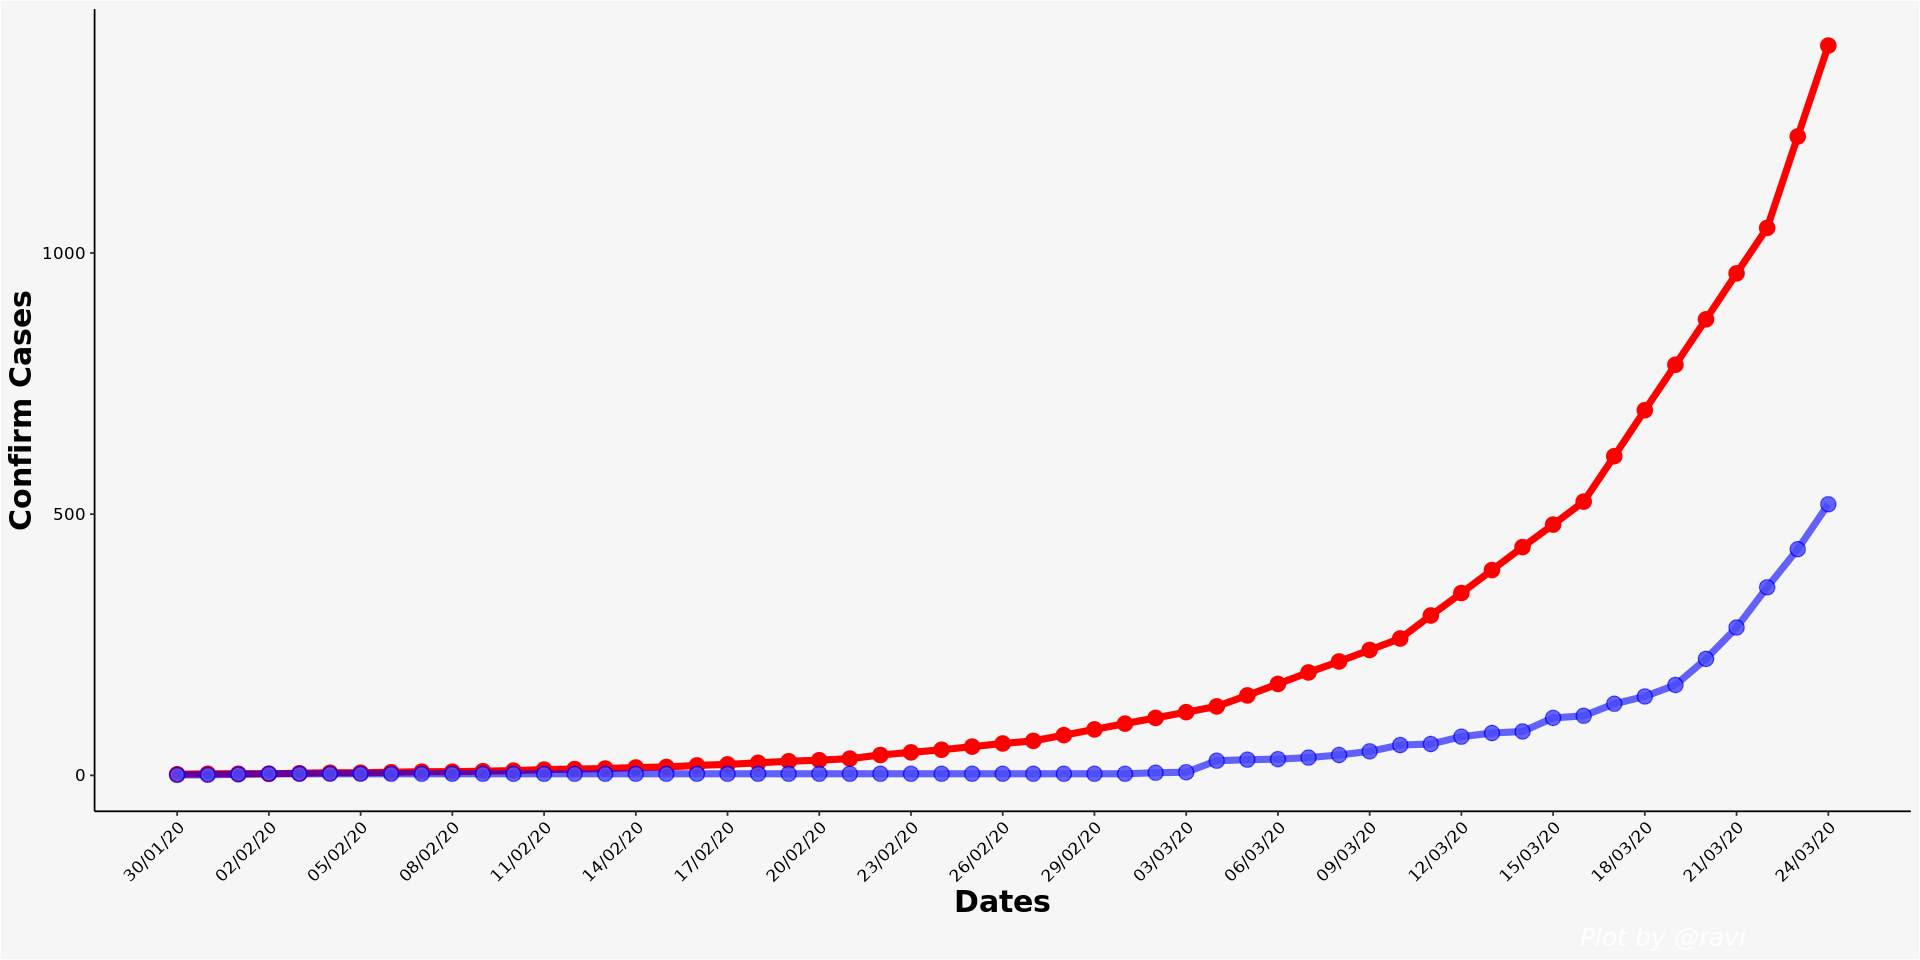

In [9]:


# before lockdown
ggplot(uptoLockdown, aes(Day, Expacted.Cases)) +
    geom_line(color = "red", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "red", size=4) +

    geom_line(aes(y=Atual.Cases), color = "blue", size=2, alpha=0.6) +
    geom_point(aes(y=Atual.Cases), color = "#ffffff", size=3, alpha=0.6) +
    geom_point(aes(y=Atual.Cases), color = "blue", size=4, alpha=0.6) +
    labs(x = "Dates", y = "Confirm Cases", caption = "Plot by @ravi") +

    scale_x_continuous(label = xLabels, breaks = seq(1, 55, 3)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(text = element_text(family = "Gill Sans", color = "#FFFFFF")
            ,panel.background = element_rect(fill = "#f6f6f6")
            ,plot.background = element_rect(fill = "#f6f6f6")
            ,panel.grid = element_blank()
            ,plot.title = element_text(size = 20, face = "bold", color = "#ff0000", hjust = 0.5)
            ,plot.subtitle = element_text(size = 25, family = "Courier", face = "bold", hjust = 0.5)
            ,plot.caption = element_text(size = 15, family = "Bookman", face = "italic", hjust = 0.9)
            ,axis.text.x = element_text(size = 10, angle = 45, hjust = 1, color = "black")
            ,axis.text.y = element_text(size = 10, hjust = 1, color = "black")
            ,axis.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "black")
            ,legend.position = "none"
    )

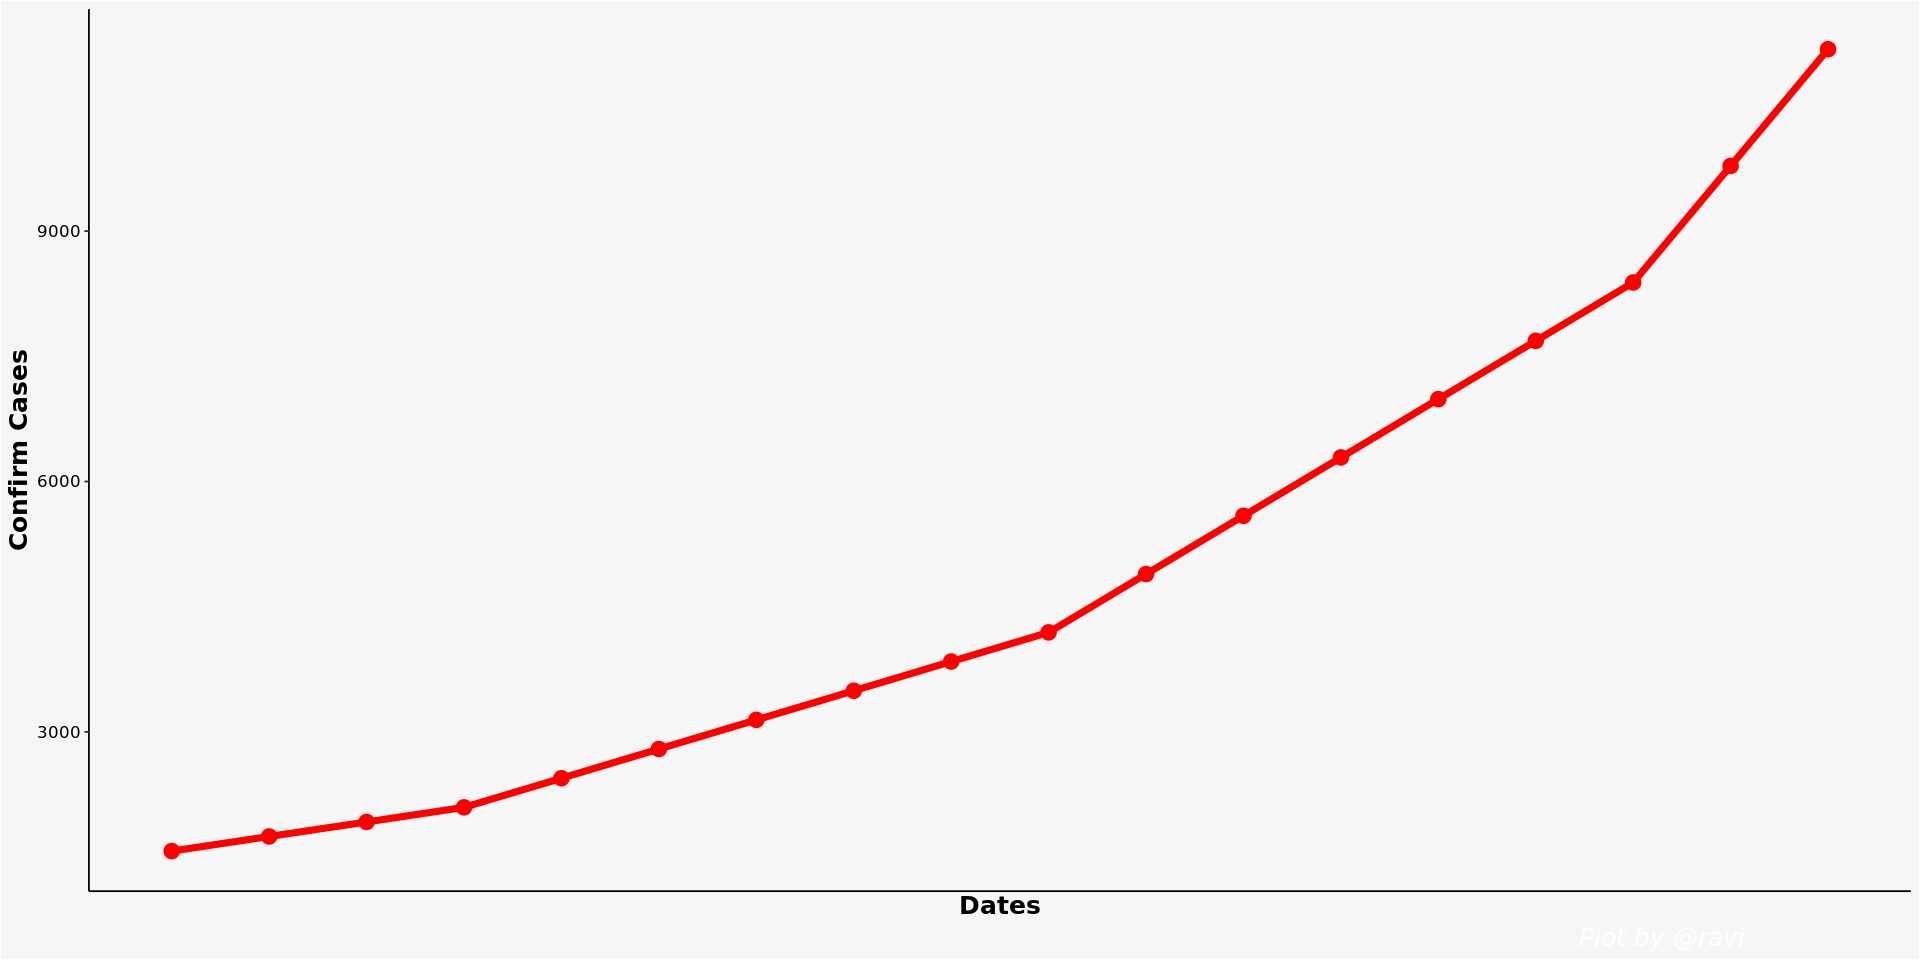

In [10]:
# after lockdown
ggplot(afterLockdown, aes(Day, Expacted.Cases)) +
    geom_line(color = "red", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "red", size=4) +
    labs(x = "Dates", y = "Confirm Cases", caption = "Plot by @ravi") +

    scale_x_continuous(label = xLabels, breaks = seq(1, 55, 3)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(text = element_text(family = "Gill Sans", color = "#FFFFFF")
            ,panel.background = element_rect(fill = "#f6f6f6")
            ,plot.background = element_rect(fill = "#f6f6f6")
            ,panel.grid = element_blank()
            ,plot.title = element_text(size = 20, face = "bold", color = "#ff0000", hjust = 0.5)
            ,plot.subtitle = element_text(size = 25, family = "Courier", face = "bold", hjust = 0.5)
            ,plot.caption = element_text(size = 15, family = "Bookman", face = "italic", hjust = 0.9)
            ,axis.text.x = element_text(size = 10, angle = 45, hjust = 1, color = "black")
            ,axis.text.y = element_text(size = 10, hjust = 1, color = "black")
            ,axis.title = element_text(size = 15, face = "bold", hjust = 0.5, color = "black")
            ,legend.position = "none"
  )

<br /><br />

## Merged

In [11]:
# preparing dataset
tail(uptoLockdown)

,Country,Date,Day,Atual.Cases,Expacted.Cases
50,India,19/03/20,50,173,786
51,India,20/03/20,51,223,873
52,India,21/03/20,52,283,961
53,India,22/03/20,53,360,1048
54,India,23/03/20,54,433,1223
55,India,24/03/20,55,519,1397


In [12]:
days = (uptoLockdown$Day)
#days

In [13]:
df = NULL

# 0: Expacted
# 1: Reported

cases = NULL
d = NULL
conf = NULL
for(day in days){
    n1 = as.numeric(uptoLockdown$Expacted.Cases[day])
    n2 = as.numeric(uptoLockdown$Atual.Cases[day])
    
    #cat(n1, " ", n2, "\n")
    
    d = c(d, rep(day, n1))
    #conf = c(conf, rep('Expacted', n1-n2), rep('Reported', n2))
    conf = c(conf, rep(0, n1-n2), rep(1, n2))
}

df = cbind(Day = d, Confirmed = conf)

In [14]:
df = as.data.frame(df)
head(df)
class(df$Confirmed)

Day,Confirmed
1,0
1,1
2,0
2,0
2,1
3,0


[1] "numeric"

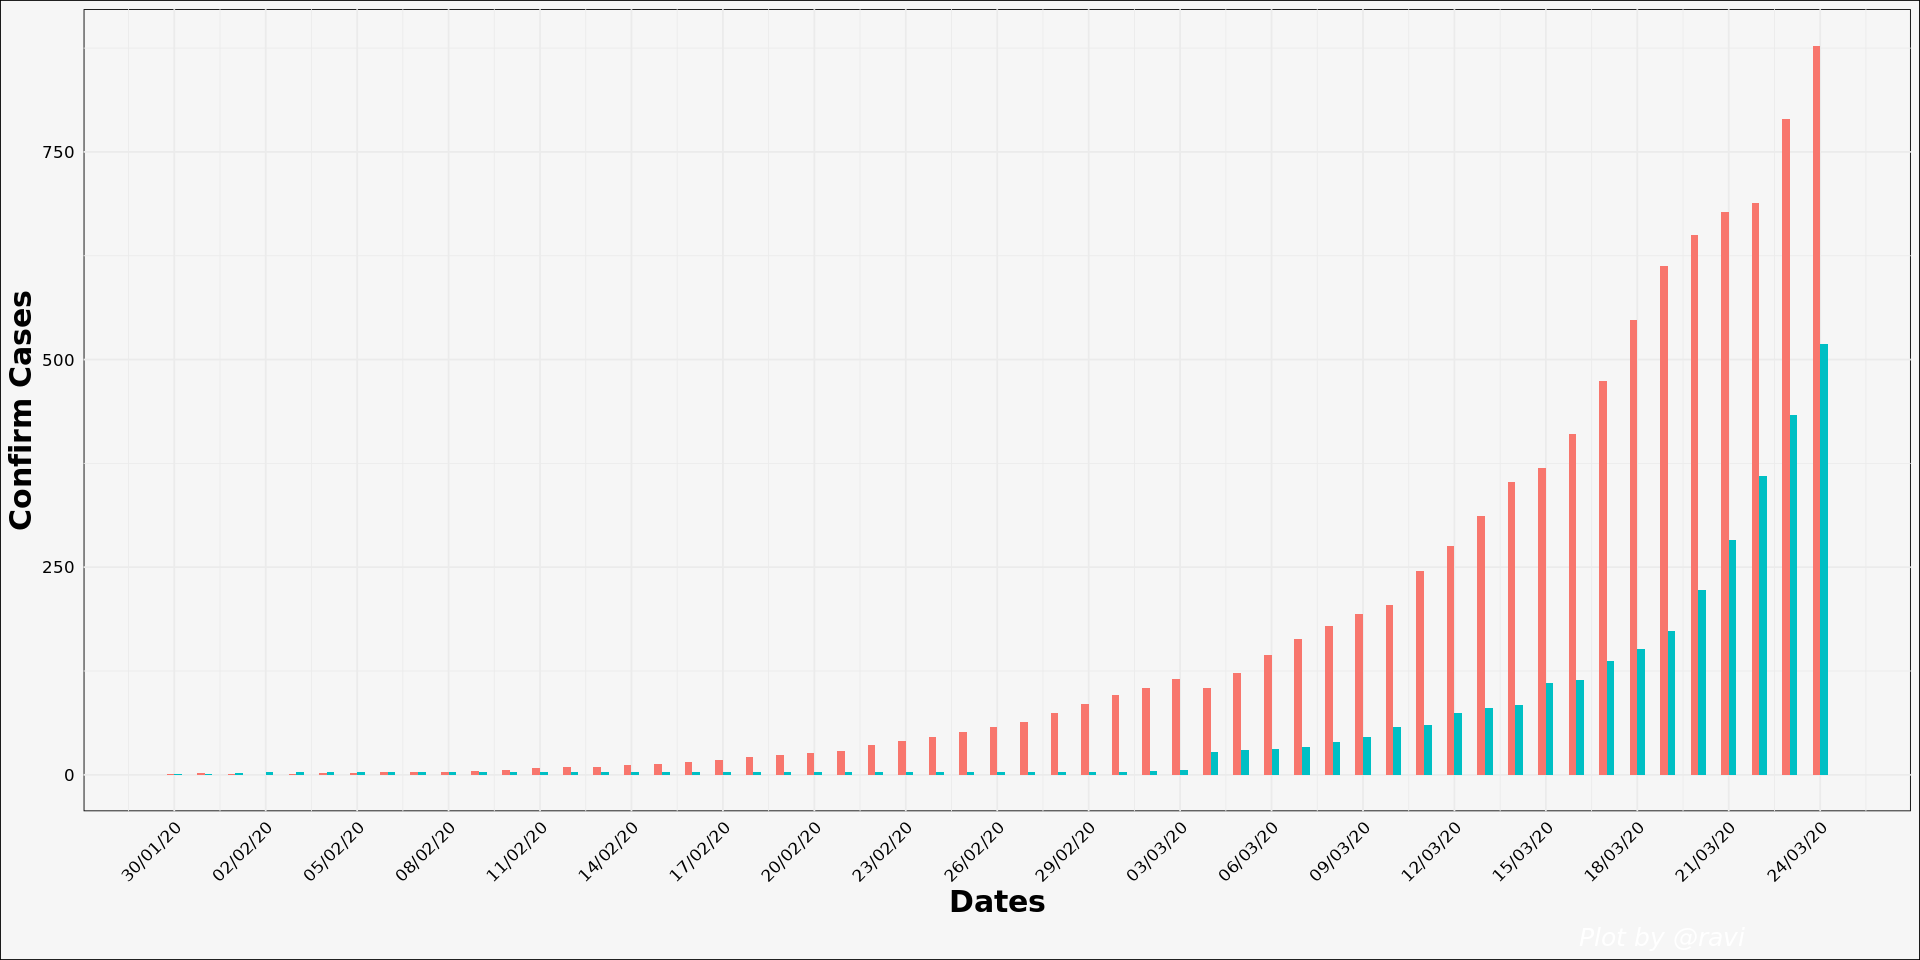

In [22]:
options(repr.plot.width=16, repr.plot.height=8)

# Confirmed cases with Days
ggplot(df, aes(x = Day, fill = factor(Confirmed))) +
  geom_histogram(binwidth = 0.5, position="dodge") +scale_color_brewer(palette="Accent") + 
  theme_minimal()+theme(legend.position="top") +
  labs(x = "Dates", y = "Confirm Cases", fill = "Cases", caption = "Plot by @ravi") +
  labs(fill="")

  scale_x_continuous(label = xLabels, breaks = seq(1, 55, 3)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(text = element_text(family = "Gill Sans", color = "#FFFFFF")
            ,panel.background = element_rect(fill = "#f6f6f6")
            ,plot.background = element_rect(fill = "#f6f6f6")
            ,plot.title = element_text(size = 20, face = "bold", color = "#ff0000", hjust = 0.5)
            ,plot.subtitle = element_text(size = 25, family = "Courier", face = "bold", hjust = 0.5)
            ,plot.caption = element_text(size = 15, family = "Bookman", face = "italic", hjust = 0.9)
            ,axis.text.x = element_text(size = 10, angle = 45, hjust = 1, color = "black")
            ,axis.text.y = element_text(size = 10, hjust = 1, color = "black")
            ,axis.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "black")
            ,legend.position = "none"
  )

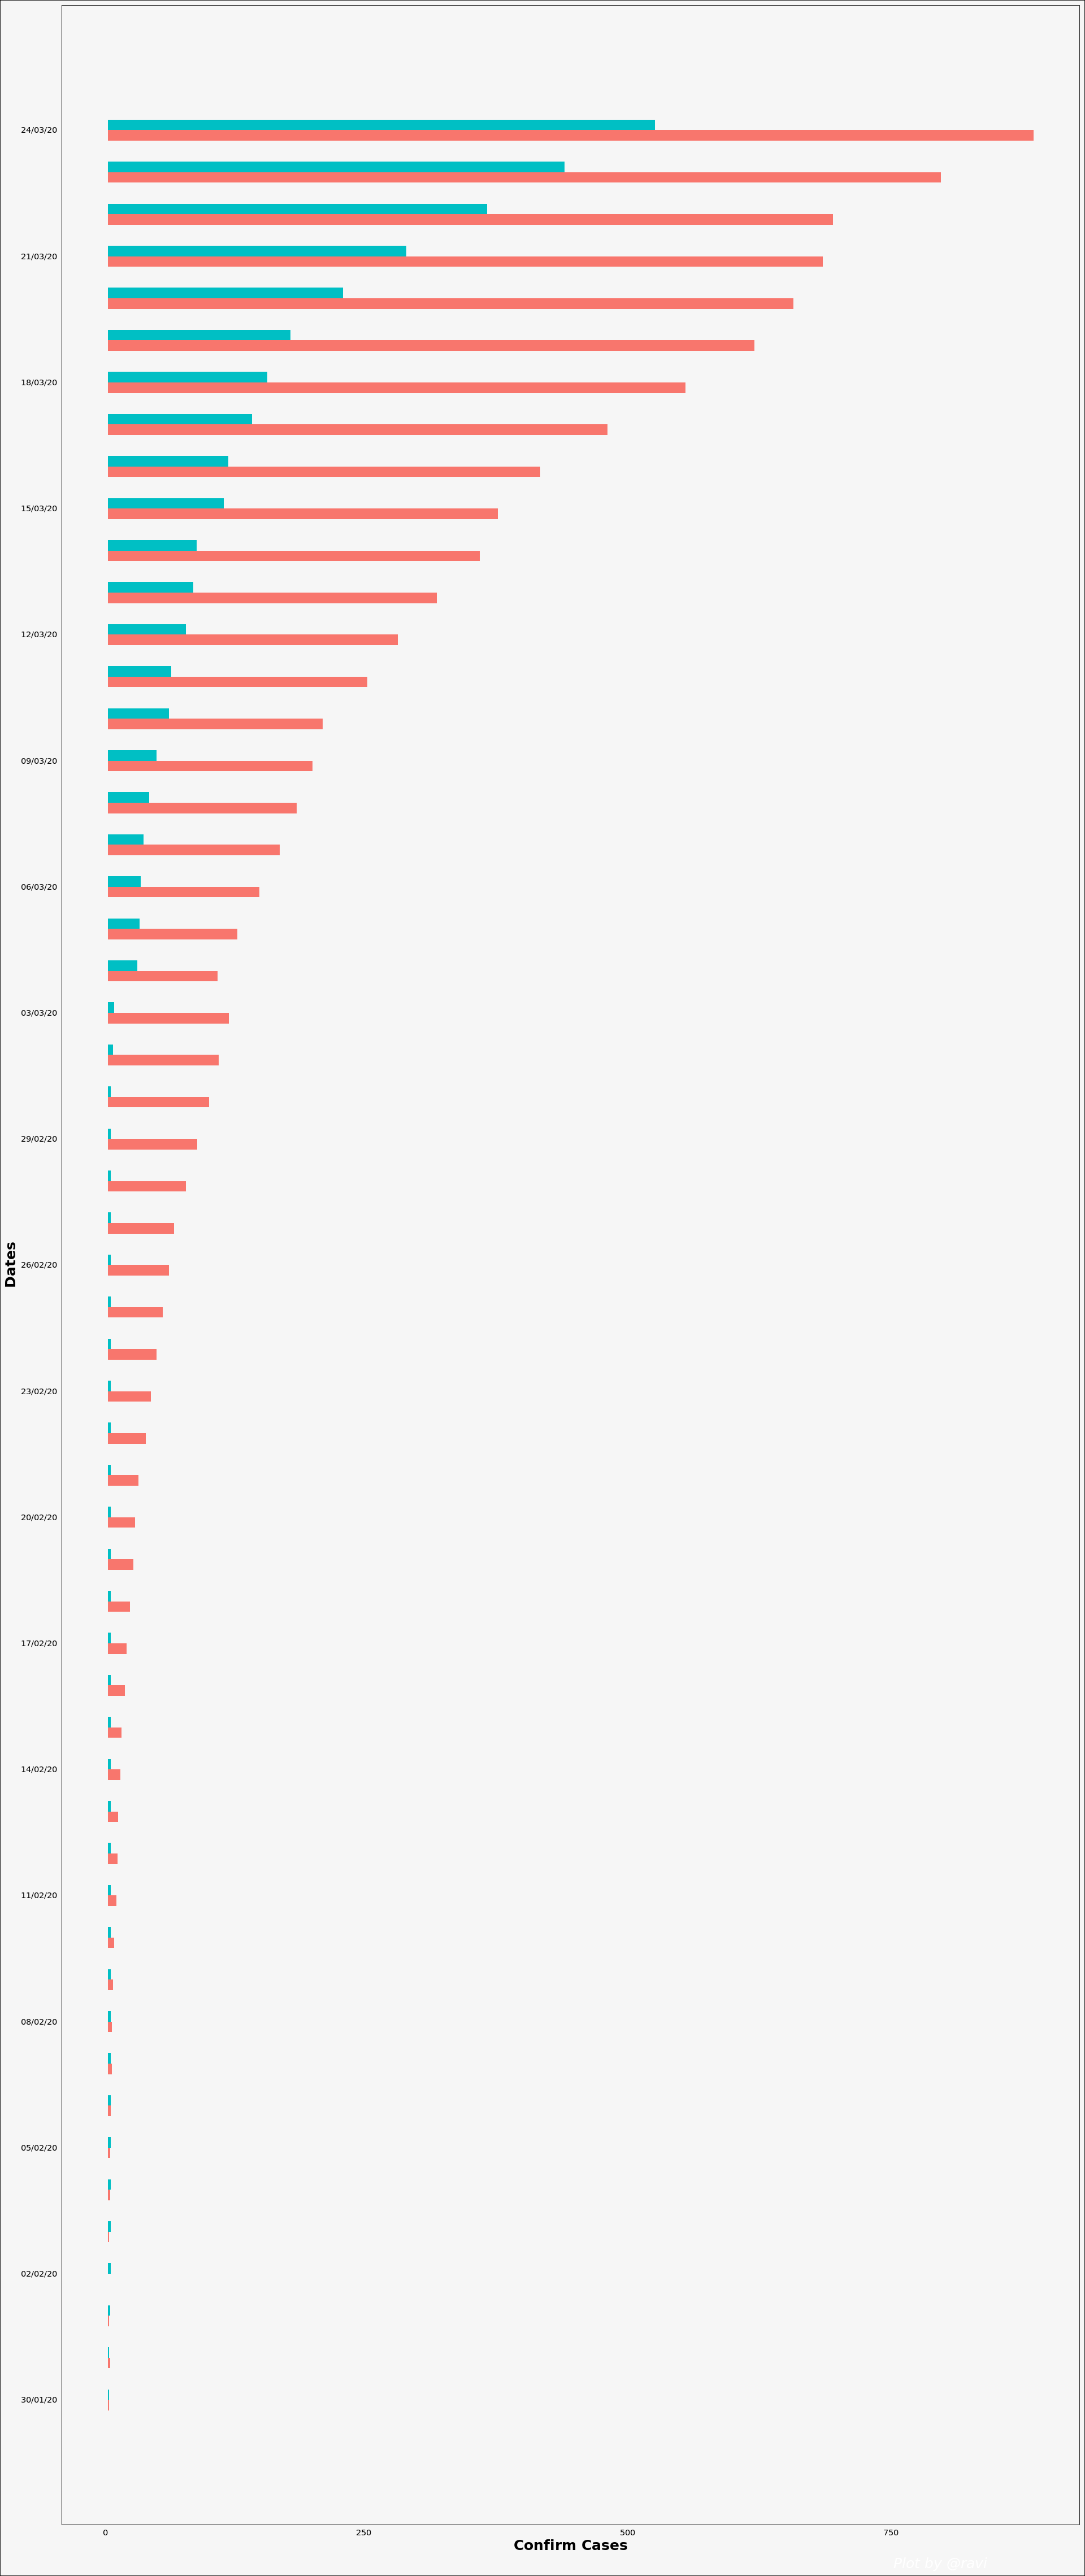

In [16]:
options(repr.plot.width=16, repr.plot.height=38)

# Confirmed cases with Days
ggplot(df, aes(y = Day, fill = factor(Confirmed))) +
  geom_histogram(binwidth = 0.5, position="dodge") +scale_color_brewer(palette="Accent") + 
  theme_minimal()+theme(legend.position="top") +
  labs(y = "Dates", x = "Confirm Cases", fill = "Cases", caption = "Plot by @ravi") +

  scale_y_continuous(label = xLabels, breaks = seq(1, 55, 3)) +
  theme(text = element_text(family = "Gill Sans", color = "#FFFFFF")
            ,panel.background = element_rect(fill = "#f6f6f6")
            ,plot.background = element_rect(fill = "#f6f6f6")
            ,panel.grid = element_blank()
            ,plot.title = element_text(size = 20, face = "bold", color = "#ff0000", hjust = 0.5)
            ,plot.subtitle = element_text(size = 25, family = "Courier", face = "bold", hjust = 0.5)
            ,plot.caption = element_text(size = 15, family = "Bookman", face = "italic", hjust = 0.9)
            ,axis.text.x = element_text(hjust = 1, color = "black")
            ,axis.text.y = element_text(hjust = 1, color = "black")
            ,axis.title = element_text(size = 15, face = "bold", hjust = 0.5, color = "black")
            ,legend.position = "none"
  )

<br /><br />

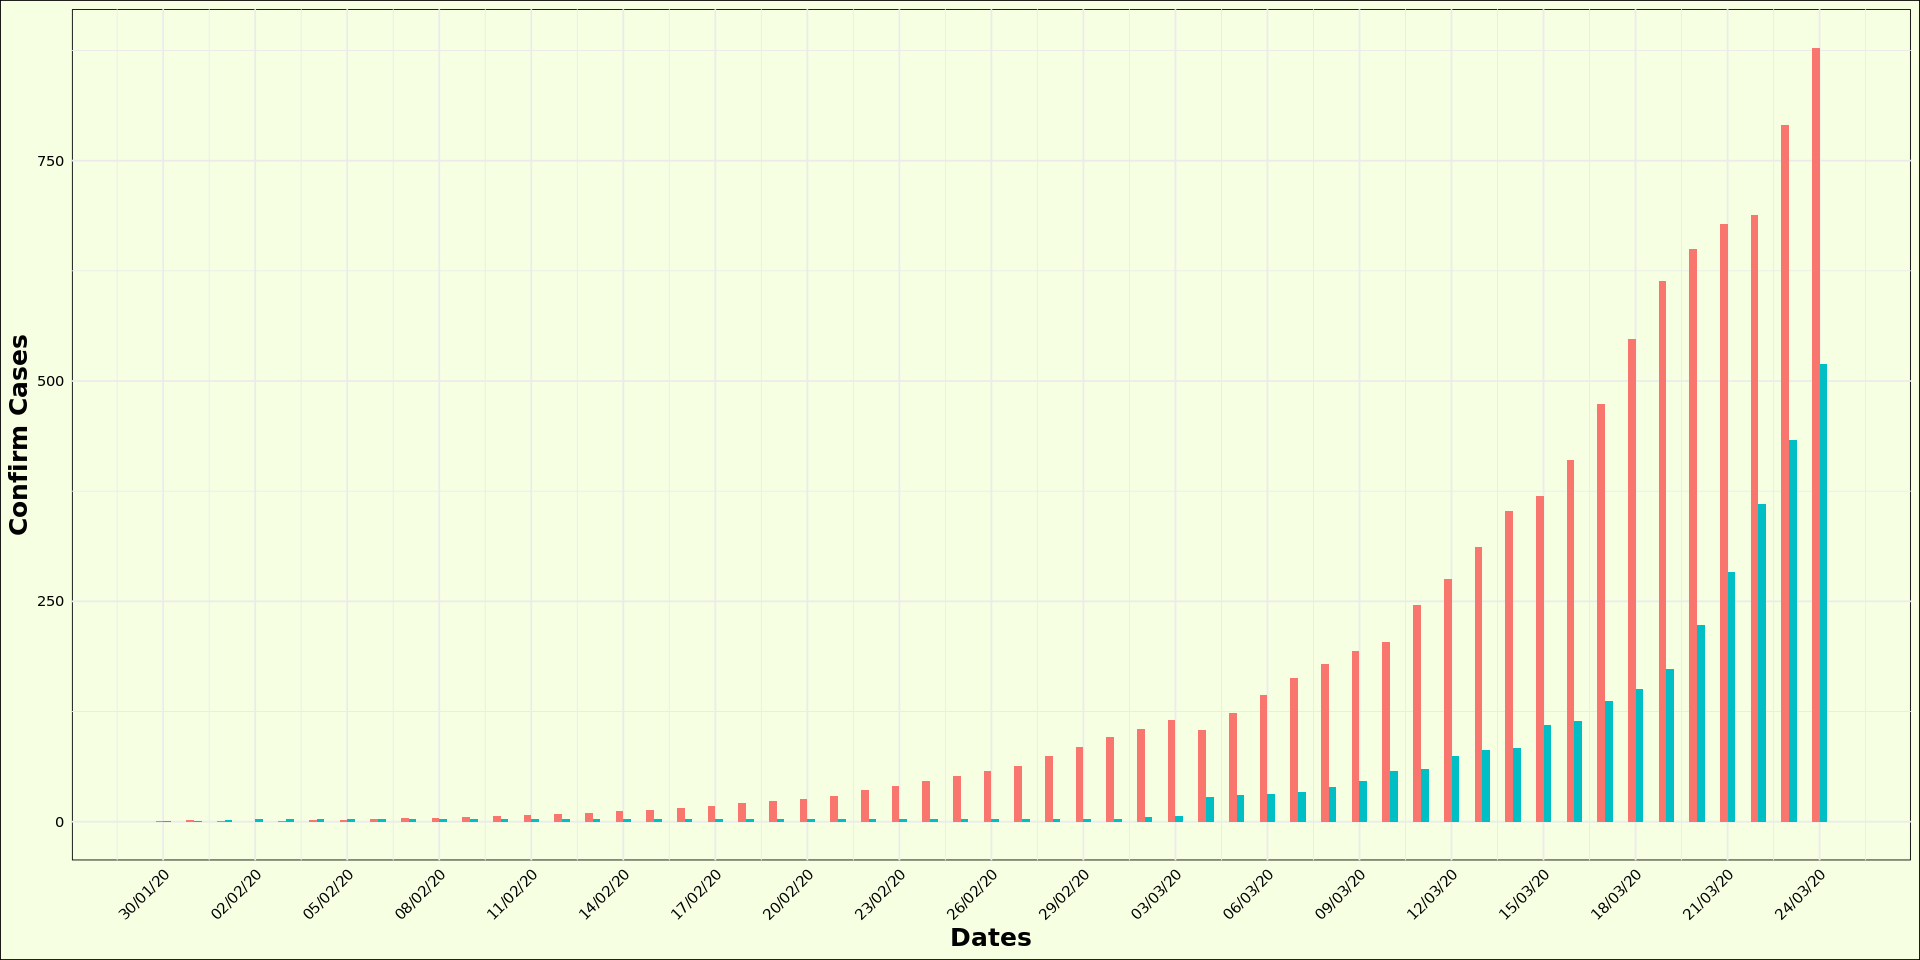

In [17]:
options(repr.plot.width=16, repr.plot.height=8)

# Confirmed cases with Days
ggplot(df, aes(x = Day, fill = factor(Confirmed)), size = 0) +
  geom_histogram(binwidth = 0.5, position="dodge") + 
  theme_minimal() +
  labs(x = "Dates", y = "Confirm Cases", fill = "Cases") +

  scale_x_continuous(label = xLabels, breaks = seq(1, 55, 3)) +
  theme(text = element_text(family = "Gill Sans", color = "#FFFFFF")
            ,panel.background = element_rect(fill = "#f6ffe2")
            ,plot.background = element_rect(fill = "#f6ffe2")
            ,plot.title = element_text(size = 20, face = "bold", color = "#ff0000", hjust = 0.5)
            ,plot.subtitle = element_text(size = 25, family = "Courier", face = "bold", hjust = 0.5)
            ,plot.caption = element_text(size = 15, family = "Bookman", face = "italic", hjust = 0.9)
            ,axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
            ,axis.text.y = element_text(hjust = 1, color = "black")
            ,axis.title = element_text(size = 15, face = "bold", hjust = 0.5, color = "black")
            ,legend.position = "none"
  )